In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('weather_hanoi.csv')
data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,lat,lon,name,timestamp_local,timestamp_utc,app_temp,azimuth,...,solar_rad,temp,ts,uv,vis,weather_code,weather_description,wind_dir,wind_gust_spd,wind_spd
0,0,0.0,52584.0,21.0285,105.8542,Hoàn Kiếm,2015-12-11T07:00:00,2015-12-11T00:00:00,17.1,117.8,...,49,17.1,1449792000,0.6,4.0,804,Overcast clouds,360,3.6,1.00
1,1,1.0,52585.0,21.0285,105.8542,Hoàn Kiếm,2015-12-11T08:00:00,2015-12-11T01:00:00,17.8,124.9,...,159,17.8,1449795600,0.8,6.0,804,Overcast clouds,360,4.0,0.66
2,2,2.0,52586.0,21.0285,105.8542,Hoàn Kiếm,2015-12-11T09:00:00,2015-12-11T02:00:00,18.6,134.3,...,233,18.5,1449799200,1.1,8.0,804,Overcast clouds,360,3.6,0.33
3,3,3.0,52587.0,21.0285,105.8542,Hoàn Kiếm,2015-12-11T10:00:00,2015-12-11T03:00:00,19.2,147.1,...,255,19.2,1449802800,1.5,10.0,804,Overcast clouds,360,4.0,1.60
4,4,4.0,52588.0,21.0285,105.8542,Hoàn Kiếm,2015-12-11T11:00:00,2015-12-11T04:00:00,19.4,163.8,...,225,19.4,1449806400,1.9,10.0,804,Overcast clouds,295,4.0,0.66


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.2         87648 non-null  int64  
 1   Unnamed: 0.1         70128 non-null  float64
 2   Unnamed: 0           61368 non-null  float64
 3   lat                  87648 non-null  float64
 4   lon                  87648 non-null  float64
 5   name                 87648 non-null  object 
 6   timestamp_local      87648 non-null  object 
 7   timestamp_utc        87648 non-null  object 
 8   app_temp             87648 non-null  float64
 9   azimuth              87648 non-null  float64
 10  clouds               87648 non-null  int64  
 11  dewpt                87648 non-null  float64
 12  dhi                  87648 non-null  int64  
 13  elev_angle           87648 non-null  float64
 14  ghi                  87648 non-null  int64  
 15  pod                  87648 non-null 

## Feature explaination:
1.  Lat : Vĩ độ 
2.  Lon: Kinh độ
3.  name: Địa điểm
4.  Timestamp_local: Thời gian tại địa điểm
5.  Timestamp_UTC: Thời gian theo UTC
6.  app_temp: nhiệt độ biểu kiến (HI, chỉ số nóng bức cảm nhận)
7. azimuth: Góc phương vị
8. clouds: Lượng mây phủ
9. dewpt: nhiệt độ hóa sương
10. dhi: lượng bức xạ mặt trời sau khi tán xạ trên 1 diện tích mặt đất
11. elev_angle: góc ngẩng (giữa đường chân trời và đường từ mắt đến mặt trời)
12. ghi: tổng lượng bức xạ của mặt trời lên phương ngang trên 1 diện tích mặt đất 
13. pod: phần của ngày (ở đây được ghi chép với 2 giá trị d (ngày) và n (đêm))
14. precip: lượng mưa (giáng thủy)
15. pres: áp suất không khí
16. revision_status: tình trạng kiểm tra dự báo
17. rh: độ ẩm tương đối
18. slp: áp suất mực nước  biển
19. snow: lượng tuyết
20. solar_rad: lượng bức xạ mặt trời
21. temp: Nhiệt độ đo được
22. ts: timestamp UNIX
23. vis: tầm nhìn xa
24. uv: lượng uv
25. weather _code: mã thời tiết
26. weather_description: thời tiết 
27. wind_dir: hướng gió
28. wind_gust: độ gió giật
29. wind_spd: tốc độ gió

    Các đặc trưng địa lý: 1,2,
    Các đặc trưng theo thời gian trong ngày: 6,7,10,11,12,13
    Các đặc trưng khí tượng theo toàn thời gian: còn lại

In [4]:
data.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,lat,lon,app_temp,azimuth,clouds,dewpt,dhi,...,snow,solar_rad,temp,ts,uv,vis,weather_code,wind_dir,wind_gust_spd,wind_spd
count,87648.000000,70128.000000,61368.000000,8.764800e+04,87648.0000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,...,87648.0,87648.000000,87648.000000,8.764800e+04,87648.000000,87183.000000,87648.000000,87648.000000,87648.000000,87648.000000
mean,43823.500000,35063.500000,30683.500000,2.102850e+01,105.8542,27.611620,179.745801,71.154790,20.464375,47.459292,...,0.0,163.491021,24.906150,1.544485e+09,1.273389,9.950873,773.063139,201.594058,4.525861,2.013126
std,25301.942534,20244.354176,17715.559997,7.105468e-15,0.0000,8.407815,97.828684,28.109117,5.759539,51.809806,...,0.0,243.417183,5.633962,9.108699e+07,1.856148,2.480056,92.768006,100.668910,2.032938,0.885588
min,0.000000,0.000000,0.000000,2.102850e+01,105.8542,3.000000,0.000000,0.000000,-6.900000,0.000000,...,0.0,0.000000,5.900000,1.386720e+09,0.000000,0.000000,202.000000,0.000000,0.400000,0.000000
25%,21911.750000,17531.750000,15341.750000,2.102850e+01,105.8542,21.100000,89.300000,50.000000,17.000000,0.000000,...,0.0,0.000000,20.800000,1.465602e+09,0.000000,10.000000,802.000000,125.000000,3.000000,1.330000
50%,43823.500000,35063.500000,30683.500000,2.102850e+01,105.8542,26.500000,180.000000,75.000000,22.300000,13.000000,...,0.0,15.000000,25.700000,1.544485e+09,0.600000,10.000000,804.000000,160.000000,4.400000,2.000000
75%,65735.250000,52595.250000,46025.250000,2.102850e+01,105.8542,34.300000,270.500000,100.000000,25.000000,107.000000,...,0.0,236.000000,28.900000,1.623367e+09,2.000000,10.000000,804.000000,305.000000,5.600000,2.660000
max,87647.000000,70127.000000,61367.000000,2.102850e+01,105.8542,53.100000,360.000000,100.000000,29.700000,128.000000,...,0.0,1061.000000,42.100000,1.702249e+09,12.100000,16.000000,804.000000,360.000000,22.400000,13.000000


In [5]:
data.isnull().sum()

Unnamed: 0.2               0
Unnamed: 0.1           17520
Unnamed: 0             26280
lat                        0
lon                        0
name                       0
timestamp_local            0
timestamp_utc              0
app_temp                   0
azimuth                    0
clouds                     0
dewpt                      0
dhi                        0
elev_angle                 0
ghi                        0
pod                        0
precip                     0
pres                       0
revision_status            0
rh                         0
slp                        0
snow                       0
solar_rad                  0
temp                       0
ts                         0
uv                         0
vis                      465
weather_code               0
weather_description        0
wind_dir                   0
wind_gust_spd              0
wind_spd                   0
dtype: int64

In [6]:
data = data.drop(['Unnamed: 0','Unnamed: 0.2','Unnamed: 0.1','name','timestamp_utc', 'pod', 'revision_status','ts'], axis = 1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lat                  87648 non-null  float64
 1   lon                  87648 non-null  float64
 2   timestamp_local      87648 non-null  object 
 3   app_temp             87648 non-null  float64
 4   azimuth              87648 non-null  float64
 5   clouds               87648 non-null  int64  
 6   dewpt                87648 non-null  float64
 7   dhi                  87648 non-null  int64  
 8   elev_angle           87648 non-null  float64
 9   ghi                  87648 non-null  int64  
 10  precip               87648 non-null  float64
 11  pres                 87648 non-null  int64  
 12  rh                   87648 non-null  int64  
 13  slp                  87648 non-null  int64  
 14  snow                 87648 non-null  int64  
 15  solar_rad            87648 non-null 

In [8]:
import datetime as dt
from datetime import timedelta

In [9]:
data["Date"]=pd.to_datetime(data['timestamp_local'])

## EDA

### Phân tích về độ biến động của từng đặc trưng

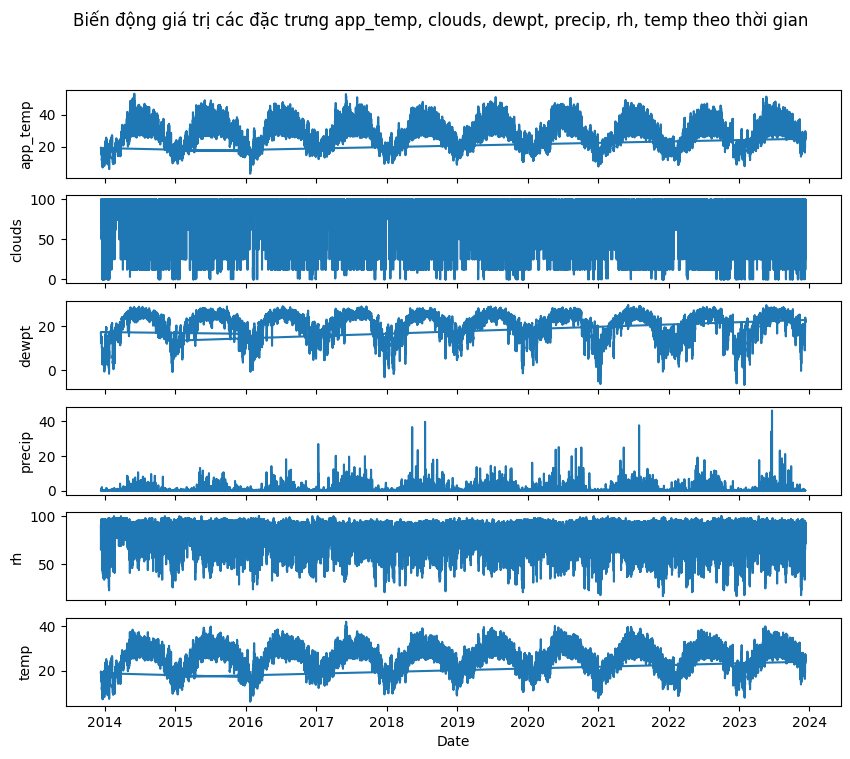

In [10]:
features = ['app_temp', 'clouds', 'dewpt', 'precip', 'rh', 'temp']

fig, axs = plt.subplots(len(features), figsize=(10, 8), sharex=True)
fig.suptitle('Biến động giá trị các đặc trưng app_temp, clouds, dewpt, precip, rh, temp theo thời gian')

for i, feature in enumerate(features):
    axs[i].plot(data['Date'], data[feature])
    axs[i].set_ylabel(feature)

plt.xlabel('Date')
plt.show()

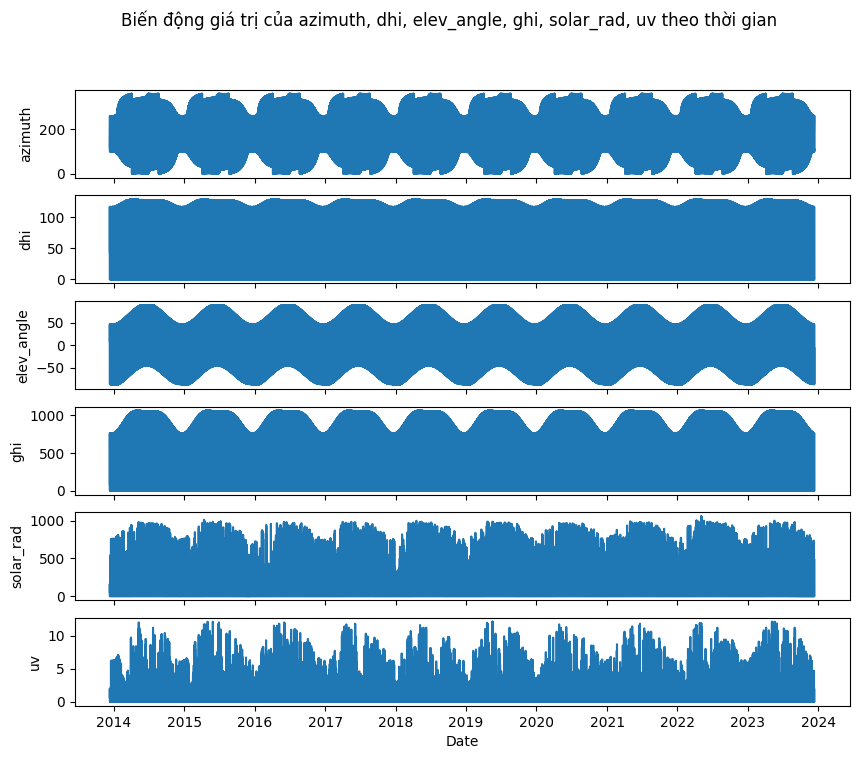

In [11]:
features = ['azimuth','dhi','elev_angle','ghi','solar_rad','uv']

fig, axs = plt.subplots(len(features), figsize=(10, 8), sharex=True)
fig.suptitle('Biến động giá trị của azimuth, dhi, elev_angle, ghi, solar_rad, uv theo thời gian')

for i, feature in enumerate(features):
    axs[i].plot(data['Date'], data[feature])
    axs[i].set_ylabel(feature)

plt.xlabel('Date')
plt.show()

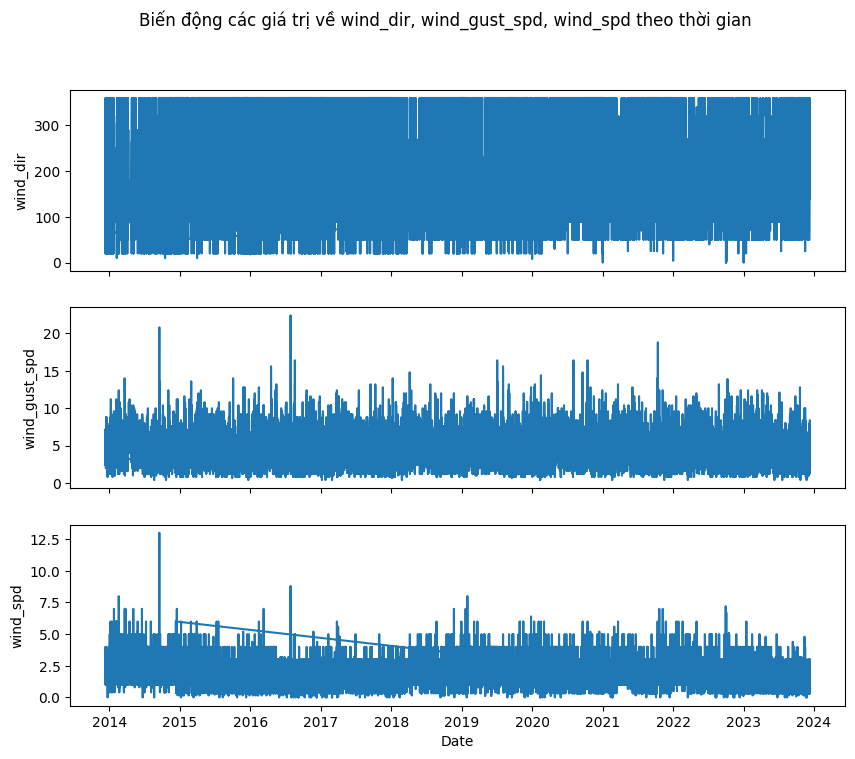

In [12]:
features = ['wind_dir','wind_gust_spd','wind_spd']

fig, axs = plt.subplots(len(features), figsize=(10, 8), sharex=True)
fig.suptitle('Biến động các giá trị về wind_dir, wind_gust_spd, wind_spd theo thời gian')

for i, feature in enumerate(features):
    axs[i].plot(data['Date'], data[feature])
    axs[i].set_ylabel(feature)

plt.xlabel('Date')
plt.show()

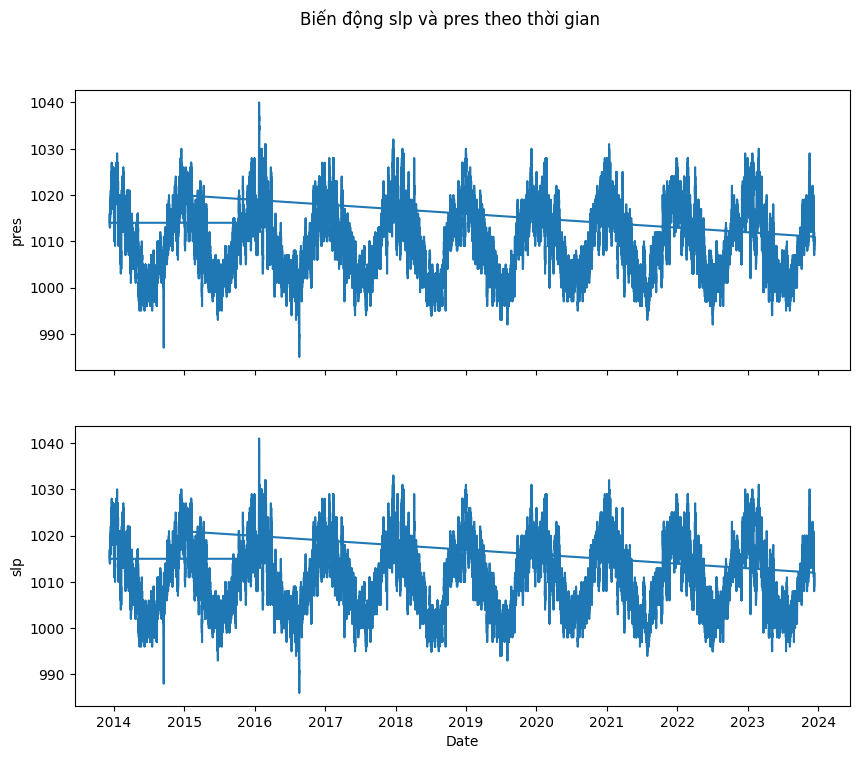

In [13]:
features = ['pres','slp']

fig, axs = plt.subplots(len(features), figsize=(10, 8), sharex=True)
fig.suptitle('Biến động slp và pres theo thời gian')

for i, feature in enumerate(features):
    axs[i].plot(data['Date'], data[feature])
    axs[i].set_ylabel(feature)

plt.xlabel('Date')
plt.show()

Quan sát: 
* Những đặc trưng phụ thuộc nặng nề theo thời gian trong ngày, diễn ra theo chu kỳ trong ngày thì biểu đồ dầy, mượt và đối xứng. Những đặc trưng này không bị phụ thuộc vào các đặc điểm khí tượng khác.
* Những đặc trưng khí tượng như app_temp, temp, dewpt, percip có xu hướng đối xứng. Đây là những đặc trưng diễn ra theo chu kỳ trong năm, do đó ít trơn mịn hơn.
* Các đặc trưng còn lại dường như có độ đều theo các tháng.

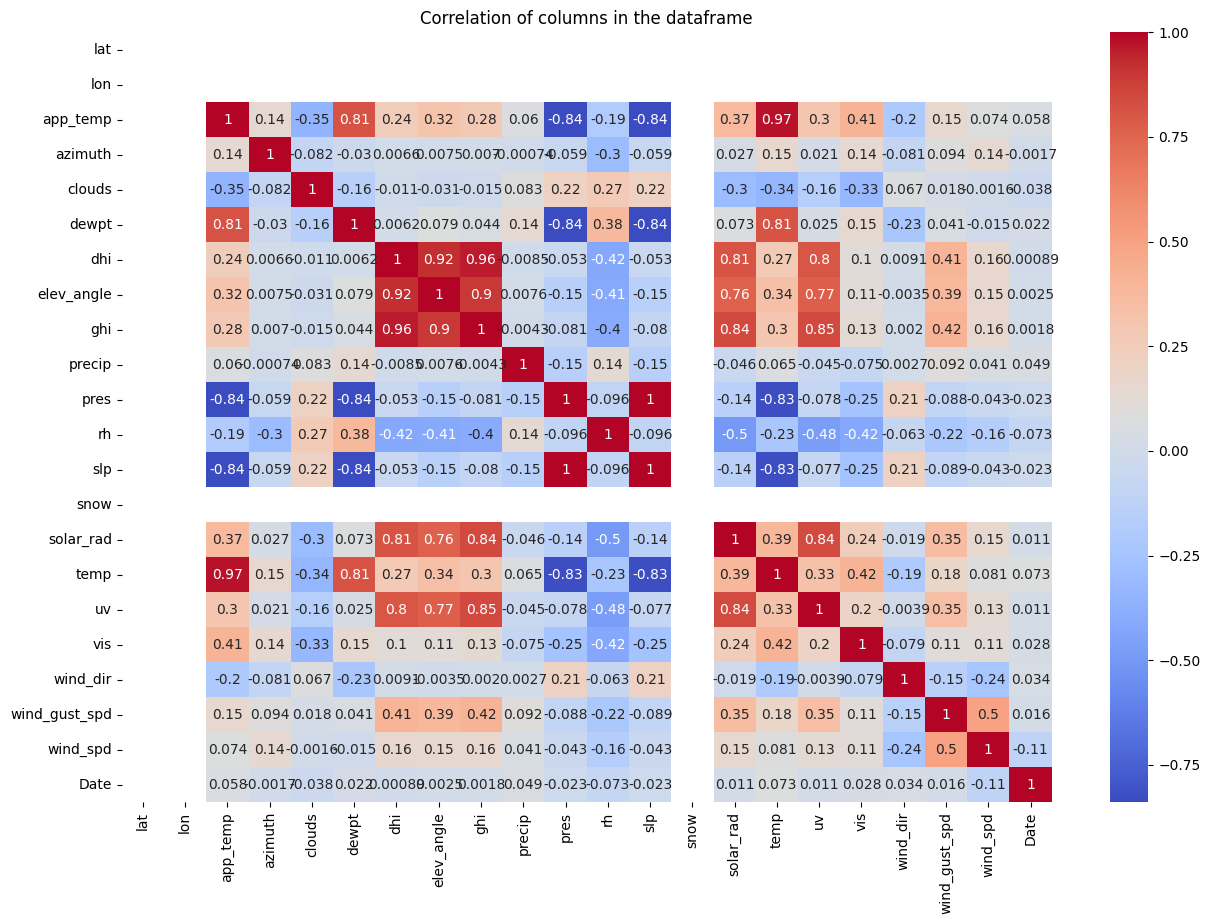

In [14]:
#correlation
data_corr=data.drop(['timestamp_local','weather_code','weather_description'], axis = 1)
# assign data correlation matrix
relation = data_corr.corr()
# Increase the size of the heatmap
plt.figure(figsize=(15,10))
# Store heatmap object in a variable to easily access it when you want to include more features and you can set the annotation parameter to True to display the correlation values on the heatmap.
sns.heatmap(data=relation,annot=True,cmap='coolwarm')
# Give a title to the heatmap.
plt.title("Correlation of columns in the dataframe")
# # save the figure.
# plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

Quan sát: 
* Các đặc trưng địa lý diễn ra theo ngày như quan sát trước đó:'azimuth','dhi','elev_angle','ghi','solar_rad','uv' thường có ít mối quan hệ đến các đặc trưng khác. Lưu ý nhóm chỉ số 'dhi','elev_angle','ghi','solar_rad','uv' liên quan với nhau bởi khái niệm lượng bức xạ nên phụ thuộc rõ rệt (tỉ lệ thuận)
* Các cặp đặc trưng tỉ lệ nghịch với nhau lớn <-0,45: 
    -  app_temp & pres, app_temp & slp
    -  dewpt & pres, dewpt & slp 
    -  pres & temp, slp & temp
    -  rh & solar_rad, rh & uv
* Các đặc trưng tỉ lệ thuận với nhau > 0,45:
    -  app_temp &dewpt, app_temp &temp
    -  dewpt &temp
    -  dhi & elev_angle, dhi &ghi, dhi & solar_rad, dhi & uv,...
    -  rh & dewpt
* Từ đó, một số đặc trưng ít liên quan đến như 'clouds', 'precip', 'rh' trở nên thành những đặc trưng quan trọng. 

In [15]:
#không có tuyết nên drop luôn cột này đi
data = data.drop(['snow'], axis = 1)

In [16]:
#Kinh độ và vĩ độ không đổi, cũng drop luôn
data = data.drop(['lat','lon'], axis = 1)

### Nhãn và các đặc trưng

In [17]:
Weather= data['weather_description'].value_counts().reset_index()
Weather.columns=['Weather','Count']
Weather

,Weather,Count
0,Overcast clouds,44666
1,Broken clouds,18580
2,Scattered clouds,9764
3,Light rain,7021
4,Few clouds,3828
5,Clear Sky,1435
6,Fog,939
7,Moderate rain,674
8,Thunderstorm with heavy rain,274
9,Heavy rain,250


In [18]:
print(217*100/(len(data)))

0.24758123402701715


Chúng ta có tận 11 nhãn thời tiết, số lượng mẫu cho từng nhãn rất mất cân bằng (lớp thiểu số chiếm 0,24%<1%). Thời tiết ở nơi này đa phần liên quan về mây.  

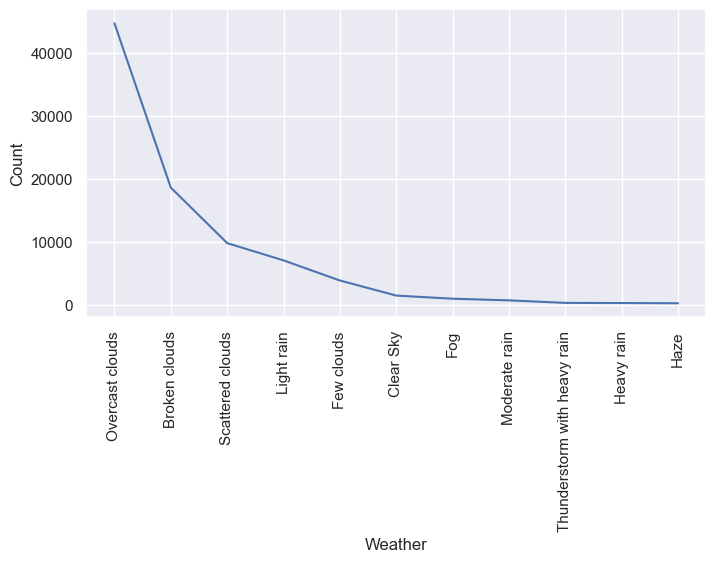

In [19]:
sns.set(rc={'figure.figsize':(8,4)})
plt.xticks(rotation=90)
sns.lineplot(x=Weather['Weather'],y=Weather['Count'],data=Weather)
plt.show()

<Axes: title={'center': 'Weather and Temperature'}, xlabel='weather_description', ylabel='temp'>

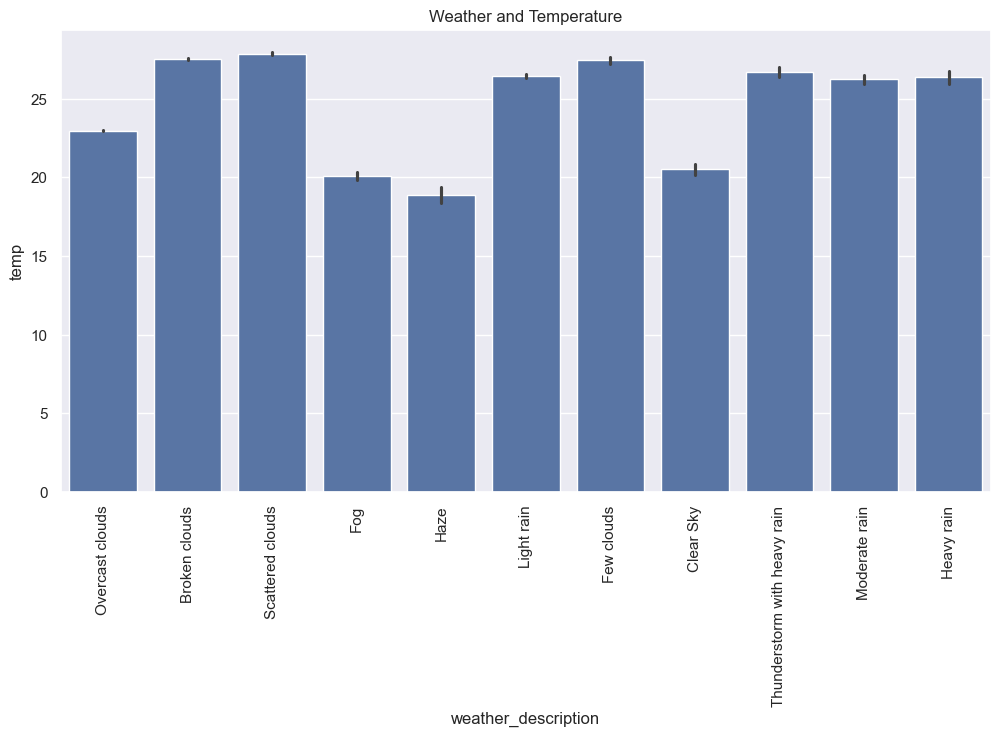

In [20]:
#Weather vs Temp 
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather and Temperature')
sns.barplot(x=data['weather_description'],y=data['temp'])

Đối với đặc trưng temp, độ lệch chuẩn trên toàn bộ mẫu của từng nhãn không lớn, riêng với nhãn Haze, Heavy rain, clear sky có độ lệch chuẩn lớn, chứng tỏ các giá trị của temp sai khác nhiều với từng mẫu nhãn này.

<Axes: title={'center': 'Weather and cloud'}, xlabel='weather_description', ylabel='clouds'>

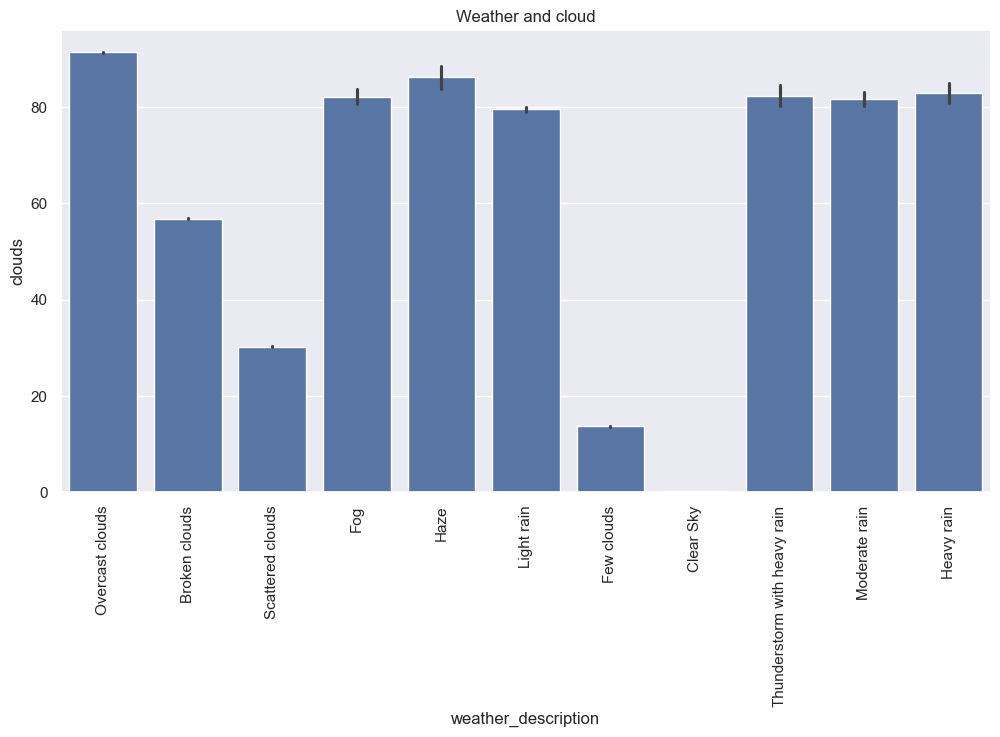

In [21]:
#Weather vs cloud
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather and cloud')
sns.barplot(x=data['weather_description'],y=data['clouds'])

Đặc trưng clouds cũng tương tự, nhưng đặc biệt với xu hướng lượng mây tăng dần thì số lượng mẫu cho từng nhãn liên quan về lượng mây cũng tăng. Đặc trưng này giúp ta xác định rõ được các nhãn thời tiết liên quan đến hiện tượng mây.

<Axes: title={'center': 'Weather and DHI'}, xlabel='weather_description', ylabel='dhi'>

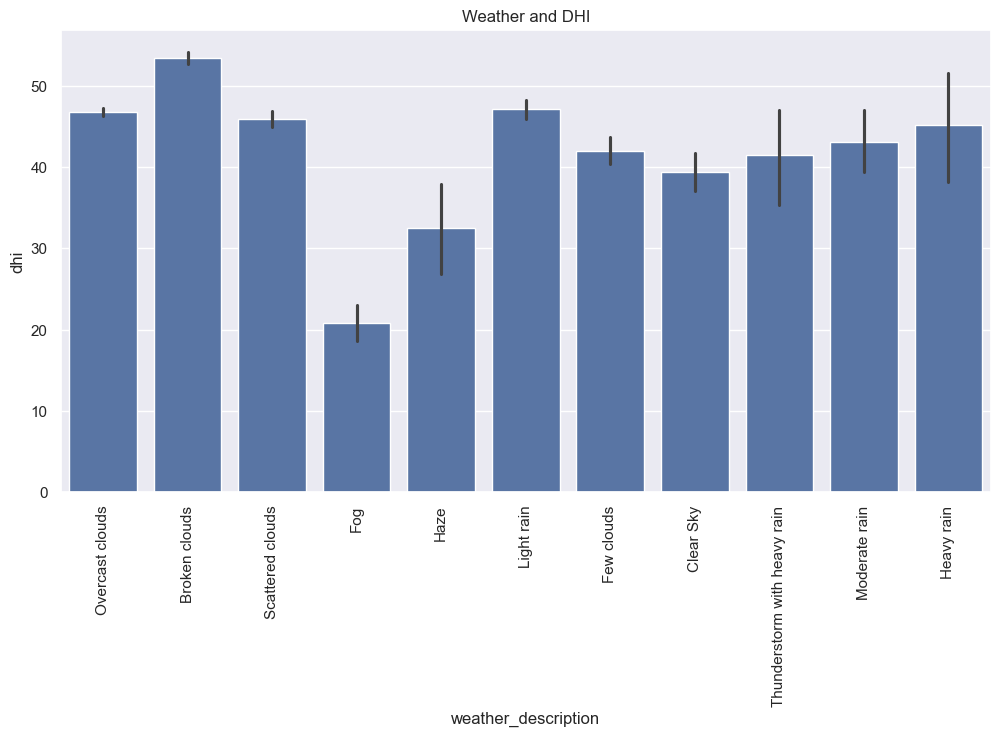

In [22]:
#Weather vs DHI
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather and DHI')
sns.barplot(x=data['weather_description'],y=data['dhi'])

Đối với đặc trưng DHI, độ lệch chuẩn trên các nhãn dữ liệu khá lớn, đặc biệt lớn với Haze, và các nhãn liên quan đến rain

<Axes: title={'center': 'Weather and pressure'}, xlabel='weather_description', ylabel='pres'>

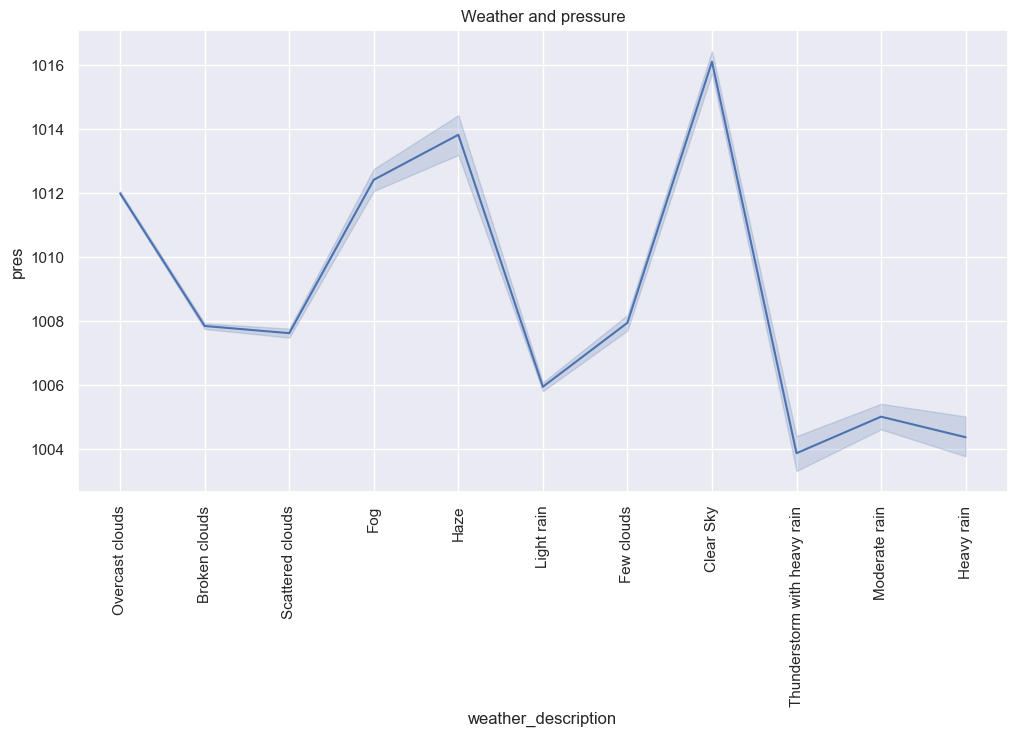

In [23]:
#Weather vs pressure
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather and pressure')
sns.lineplot(x=data['weather_description'],y=data['pres'])

<Axes: title={'center': 'Weather and Relative humid'}, xlabel='weather_description', ylabel='rh'>

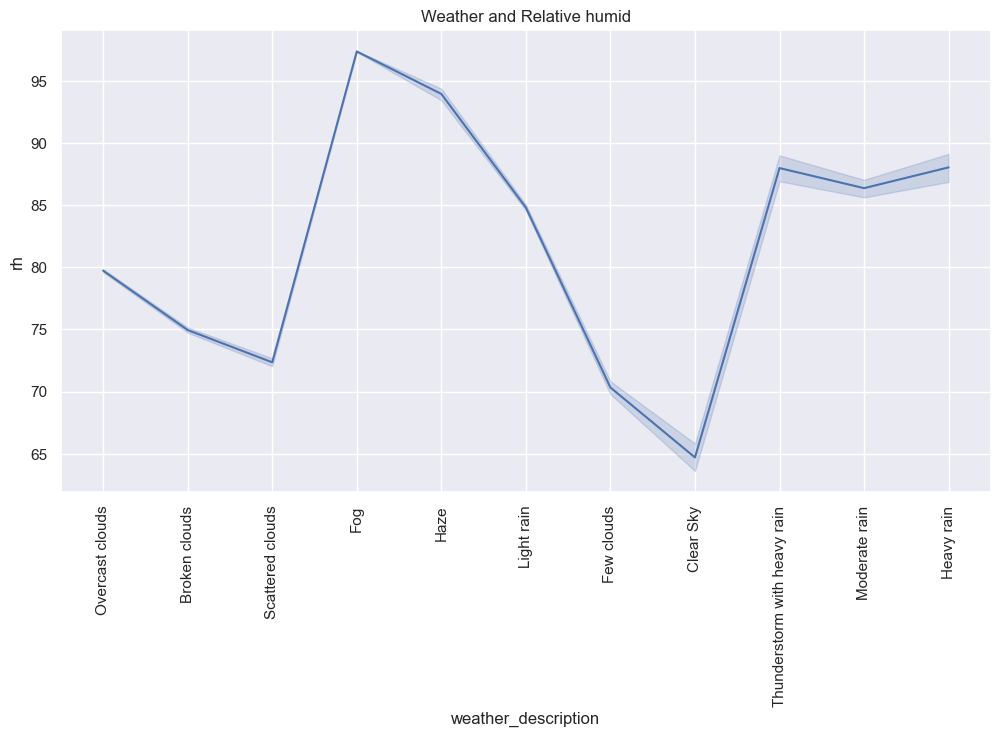

In [24]:
#Weather vs Relative humid
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather and Relative humid')
sns.lineplot(x=data['weather_description'],y=data['rh'])

Xu hướng: thời tiết từ mây đến mưa đến sương mù thì độ ẩm tăng theo.

Tóm lại:
* Các đặc trưng ảnh hưởng theo ngày làm cho mỗi nhãn lớp có độ lệch chuẩn lớn, khó để nhận biết được sau này
* Các đặc trưng quan trọng như clouds, rh, temp,... thể hiện cụ thể những nhãn lớp cụ thể hơn.

In [25]:
data = data.drop(['timestamp_local'], axis = 1)

### Phân tích theo cặp đặc trưng

In [26]:
#Mối quan hệ giữa app_temp và pres theo hồi quy
#lấy mẫu theo tháng
df_column = ['Date','temp', 'pres']
df_monthly_mean = data[df_column].resample("MS", on='Date').mean() 

df_monthly_mean

,temp,pres
Date,,
2013-12-01,13.848290,1019.832998
2014-01-01,17.196102,1018.450269
2014-02-01,17.052530,1014.157738
2014-03-01,19.806586,1012.899194
2014-04-01,24.987917,1008.540278
...,...,...
2023-08-01,29.375134,1001.825269
2023-09-01,28.512917,1006.183333
2023-10-01,27.394758,1012.685484


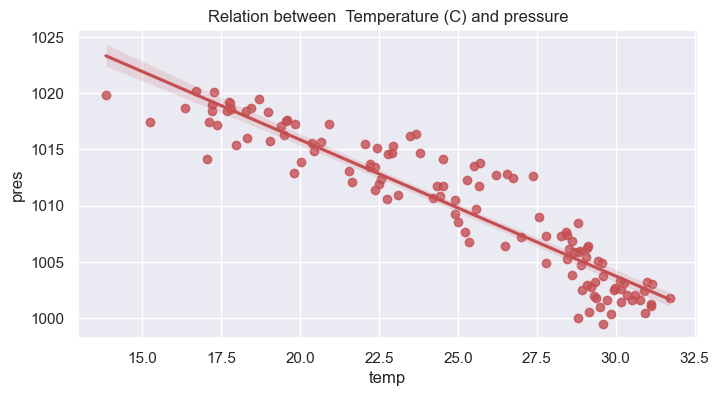

In [27]:
sns.regplot(data=df_monthly_mean, x="temp", y="pres", color="r")
plt.title("Relation between  Temperature (C) and pressure")
# 
# plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()

Càng lên cao, áp suất KK càng giảm, nhiệt độ cảm nhận được tăng theo. "When temparature increases the molecule will get energise moves apart from each other and the attraction between molecule will decreases and eventually pressure will decreases"

In [28]:
df_column_ghi_solar_rad = ['Date','ghi', 'solar_rad']
df_monthly_mean_ghi_solar_rad= data[df_column_ghi_solar_rad].resample("MS", on='Date').mean() 


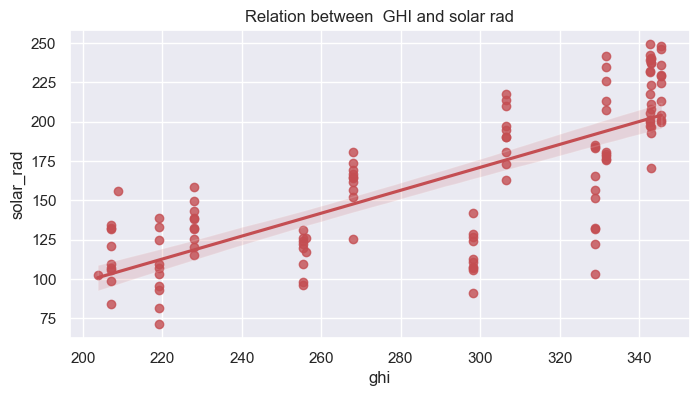

In [29]:
sns.regplot(data=df_monthly_mean_ghi_solar_rad, x="ghi", y="solar_rad", color="r")
# Give a title to the plot
plt.title("Relation between  GHI and solar rad")
# # save the figure
# plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()

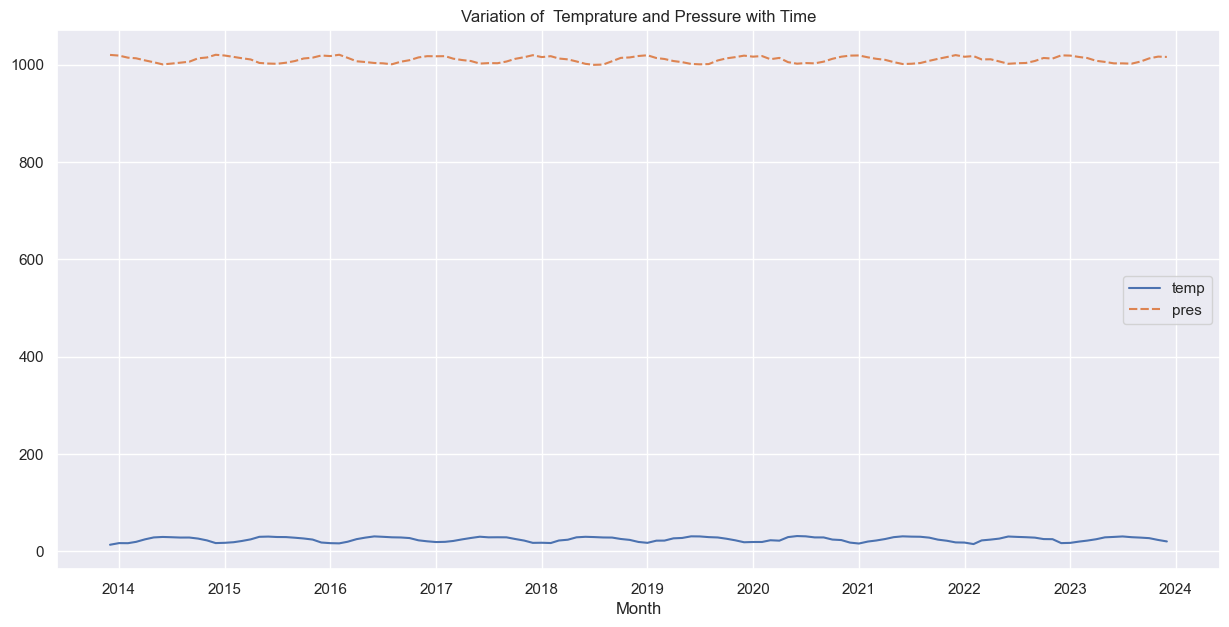

In [30]:
#Sự thay đổi hàng tháng của nhiệt độ và áp suất
plt.figure(figsize=(15,7))
sns.lineplot(data= df_monthly_mean)
plt.xlabel('Month')
plt.title('Variation of  Temprature and Pressure with Time')
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()

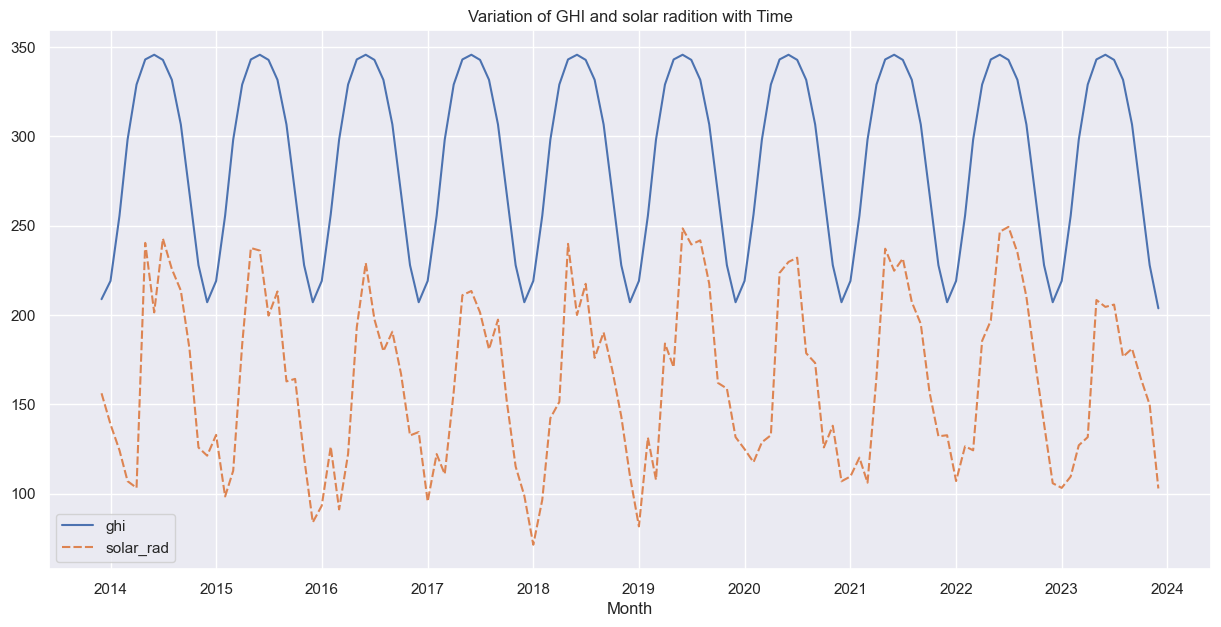

In [31]:
#Sự thay đổi hàng tháng của năng lượng mặt trời và lượng GHI
plt.figure(figsize=(15,7))
sns.lineplot(data= df_monthly_mean_ghi_solar_rad)
plt.xlabel('Month')
plt.title('Variation of GHI and solar radition with Time')
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
df_column_temp_rh = ['Date','temp', 'rh']
df_monthly_mean_temp_rh = data[df_column_temp_rh].resample("MS", on='Date').mean() 

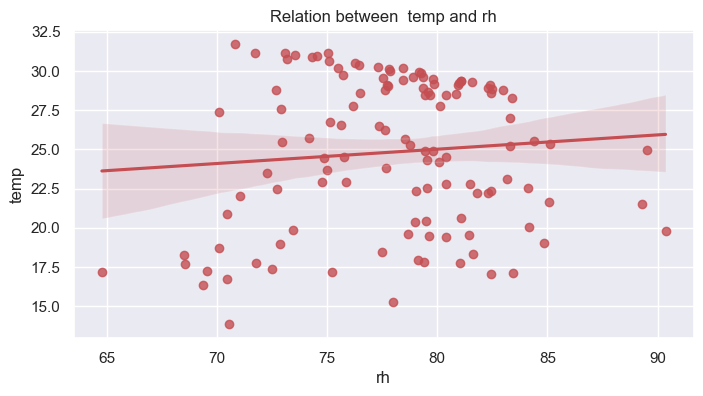

In [33]:
sns.regplot(data=df_monthly_mean_temp_rh, x="rh", y="temp", color="r")
plt.title("Relation between  temp and rh")
# plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()

Trường hợp này cho thấy 2 đặc trưng này không có mối quan hệ tuyến tính rõ ràng.

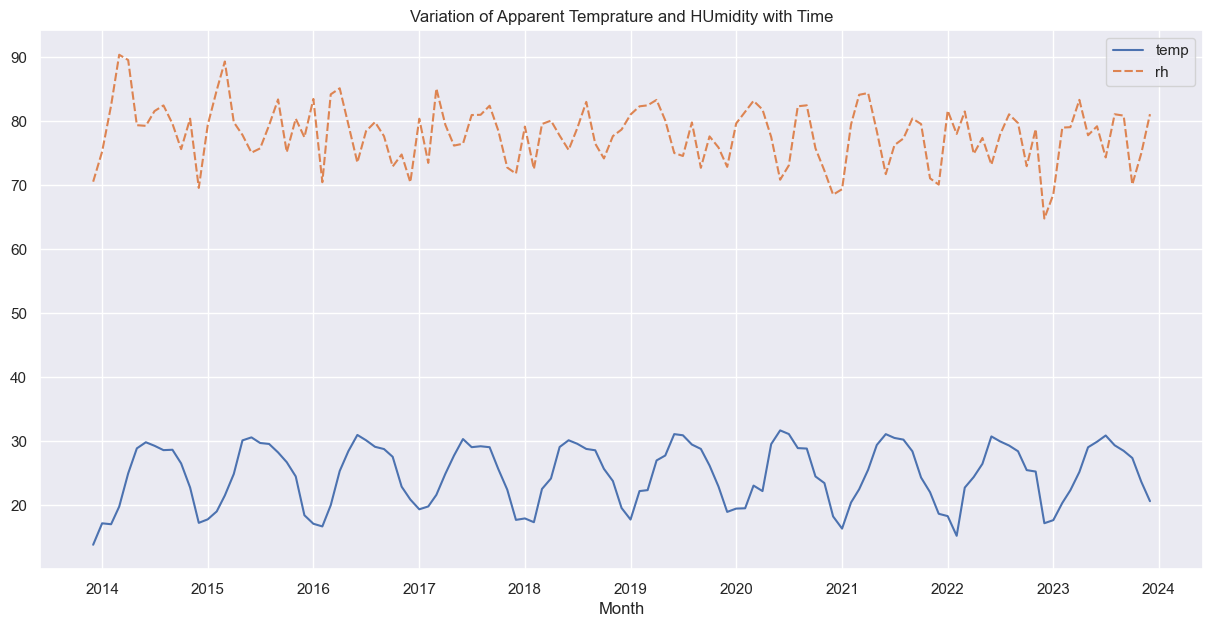

In [34]:
#Sự thay đổi hàng tháng của nhiệt độ và độ ẩm
plt.figure(figsize=(15,7))
sns.lineplot(data= df_monthly_mean_temp_rh)
plt.xlabel('Month')
plt.title('Variation of Apparent Temprature and HUmidity with Time')
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16080\4128914830.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['wind_gust_spd'], ax=ax[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_16080\4128914830.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['wind_spd'], ax=ax[1])


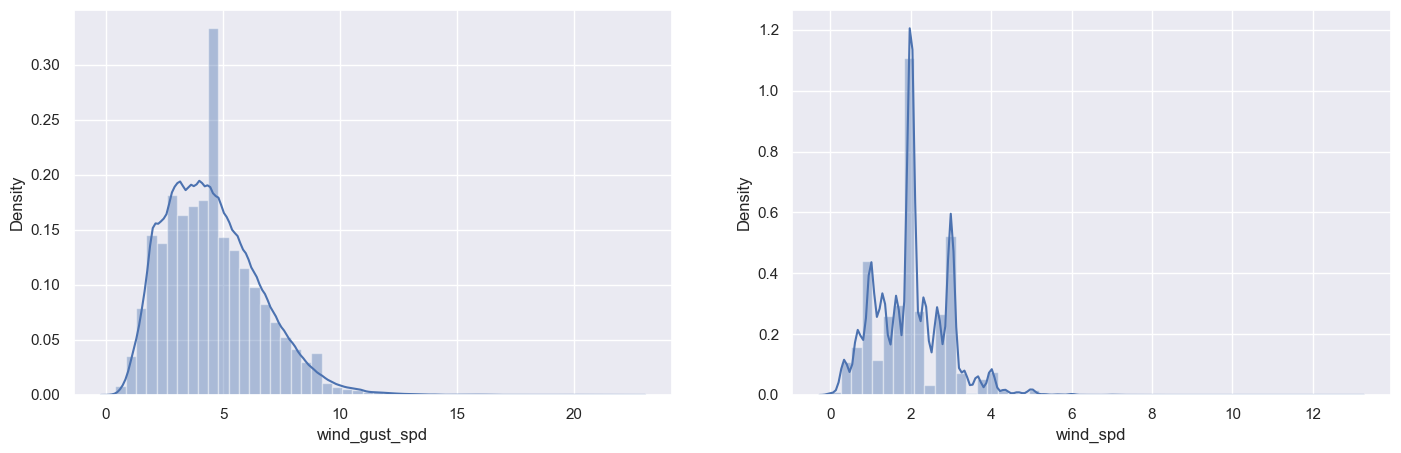

In [35]:
#Wind Features
fig, ax = plt.subplots(1,2, figsize=(17, 5))
sns.distplot(data['wind_gust_spd'], ax=ax[0])
sns.distplot(data['wind_spd'], ax=ax[1])
plt.show()

Biểu đồ thể hiện bản chất khác nhau giữa tốc độ gió giật (diễn ra trong vài giây) so với tốc độ gió trung bình bình thường (xét trong vài phút). Mật độ giá trị tốc độ giá trị được băm nhỏ hơn và tương đối trơn so với tốc độ gió bình thường.

In [36]:
# pip install plotly

In [37]:
# import plotly.express as px

In [38]:
# def angle_range(st, ed, x):
#     if st < ed: ed += 360
#     return st <= x.values < ed

# def wind_news(df):
#     df = df[df['wind_dir'] > 0]
#     df['wind_dir'][ df['wind_dir'] < 11.25 ] = df['wind_dir'][ df['wind_dir'] < 11.25 ].apply(lambda x : x+360)
    
#     wind_df = pd.DataFrame(columns=['direction', 'speed', 'frequency'])
#     angle = [ (i * 22.5 - 11.25 + 360) % 360.0 for i in range(16) ]
#     direction = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WMW', 'NW', 'NNW']
#     speed = [i*2.5 for i in range(1, 9)]
#     tot = 0
#     for ang, d  in zip(angle, direction):
#         for s in speed:
#             cnt = df[(ang <= df['wind_dir'] ) & ( df['wind_dir'] < ang+22.5 )&  (s-2.5 <= df['wind_spd']) & (df['wind_spd'] < s) ].shape[0]
#             tot += cnt
#             # Create a DataFrame from the dictionary
#             data_to_append = {'direction': [d], 'speed': [s], 'frequency': [cnt]}
#             new_data = pd.DataFrame(data_to_append)
            
#             # Concatenate the new DataFrame with the existing 'wind_df'
#             wind_df = pd.concat([wind_df, new_data], ignore_index=True)
#     return wind_df

In [39]:
# def wind_direction_plot(df, title):
#     wind = wind_news(df)
#     fig = px.bar_polar(wind, r="frequency", theta="direction",
#                        color="speed", template="plotly_dark",
#                        color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
#     fig.update_layout(title_text='HK'.format(title))
#     fig.show()

In [40]:
# wind_direction_plot(ata, str(0))

### Kiểm định giả thiết

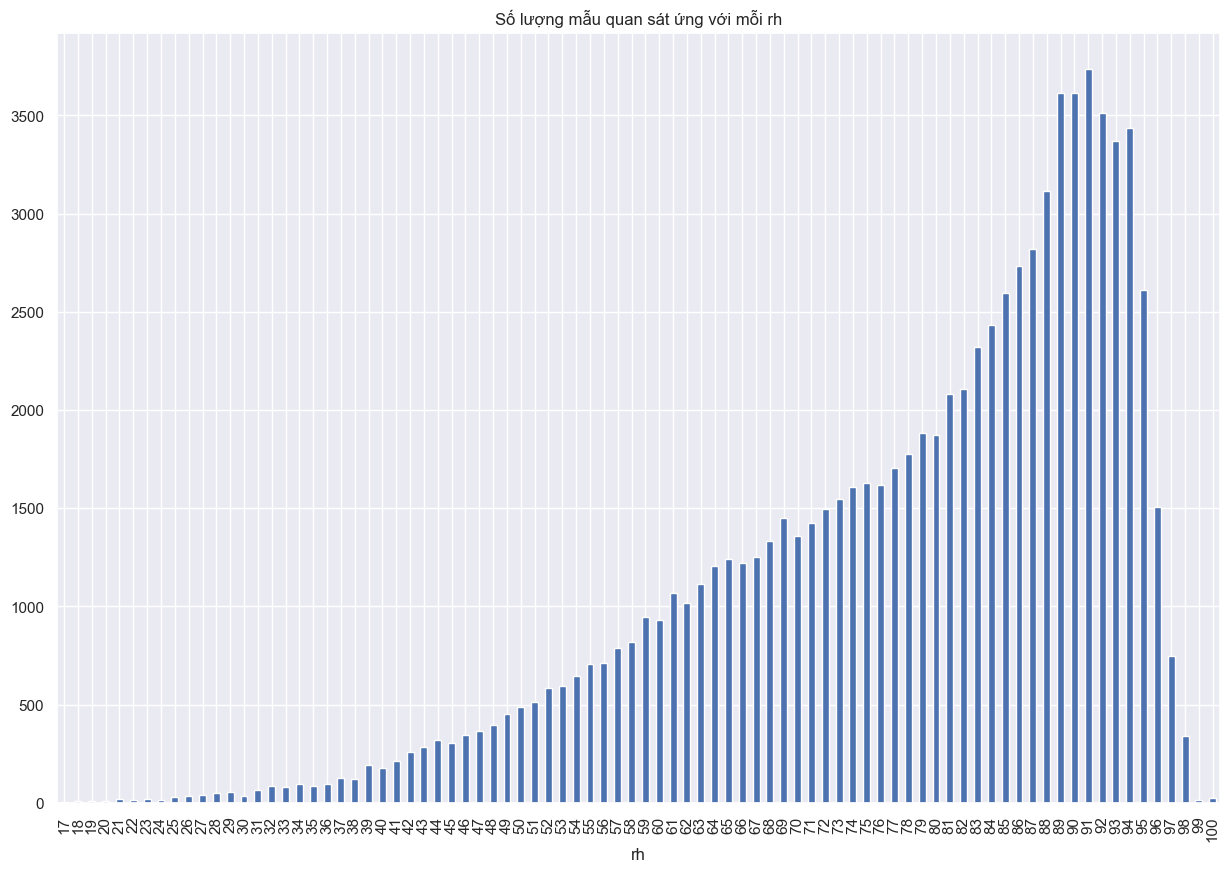

In [41]:
#Liệu chỉ riêng độ bay hơi thay đổi có ảnh hưởng đến thời tiết hay không?
plt.figure(figsize=(15,10))
data.rh.value_counts().sort_index().plot(kind='bar')
plt.title("Số lượng mẫu quan sát ứng với mỗi rh")
plt.show()

In [42]:
#Kiểm tra có cùng phân phối hay không
rh_50 = data[data['rh'] == 50]['weather_code']
rh_51 = data[data['rh'] == 51]['weather_code']

In [43]:
pip install scipy 

Note: you may need to restart the kernel to use updated packages.


In [44]:
### Null hypothesis: dữ liệu tuân theo phân phối chuẩn ###
### Nếu pValue < 0.05 ==> phản bác null hypothesis ###
from scipy import stats
rh_50_dist = stats.shapiro(rh_50)
rh_51_dist = stats.shapiro(rh_51)

print('pvalue for rh_50 distribution: ', rh_50_dist[1])
print('pvalue for rh_51 distribution: ', rh_51_dist[1])

pvalue for rh_50 distribution:  2.9062930150096706e-42
pvalue for rh_51 distribution:  2.9287137904388677e-43


Rõ ràng, phân phôi của 2 giá trị này khác phân phối chuẩn nên không thể kết luận được rh ảnh hưởng đến thời tiết.

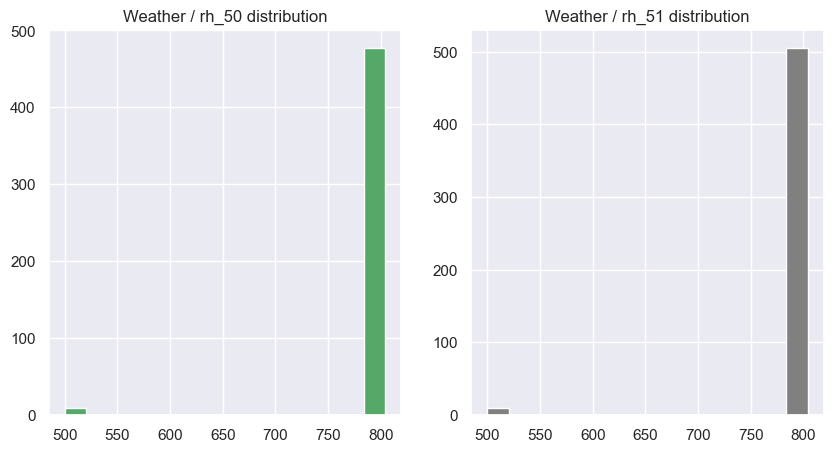

In [45]:
#Lưu ý, các giá trị thời tiết sử dụng code của chúng (thay vì dạng string)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].hist(x=rh_50, bins=15, color = 'g')
ax[0].title.set_text('Weather / rh_50 distribution')

ax[1].hist(x=rh_51, bins=15, color = 'grey')
ax[1].title.set_text('Weather / rh_51 distribution')

plt.show()


## Feature selection

[0.03090214 0.01742084 0.52353889 0.02395498 0.01321173 0.01963626
 0.01446938 0.14262061 0.01908902 0.03255715 0.0176583  0.05428479
 0.03217239 0.01012916 0.0168275  0.01674725 0.01477961]


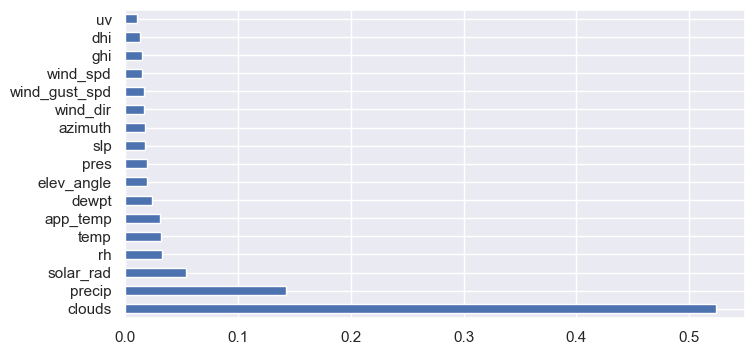

In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df_column = ['app_temp','azimuth','clouds', 'dewpt','dhi','elev_angle','ghi','precip','pres', 'rh','slp','solar_rad','temp','uv','wind_dir','wind_gust_spd','wind_spd']
X = data[df_column]  #independent columns
y = data['weather_code']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()